<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/assesment__uzma_14_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [4]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [5]:
! kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset


 89% 25.0M/28.0M [00:00<00:00, 129MB/s] 
100% 28.0M/28.0M [00:00<00:00, 120MB/s]


In [6]:
! kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset --unzip --force

 50% 14.0M/28.0M [00:00<00:00, 142MB/s]
100% 28.0M/28.0M [00:00<00:00, 144MB/s]


In [7]:
%ls

Dataset/  kaggle.json


In [8]:
from PIL import Image
image1 = Image.open('/content/drive/MyDrive/kaggle/Dataset/Mild_Demented/mild.jpg')

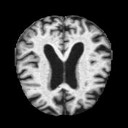

In [9]:
image1

In [16]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
import cv2
sns.set()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers

In [4]:
dir_path= '/content/drive/MyDrive/kaggle/Dataset/'
#Dataset that should go with Alzheimer label
very_mild = glob('/content/drive/MyDrive/kaggle/Dataset/Very_Mild_Demented/*')
mild = glob('/content/drive/MyDrive/kaggle/Dataset/Mild_Demented/*')
moderate = glob('/content/drive/MyDrive/kaggle/Dataset/Moderate_Demented/*')

#Dataset without Alzheimer
non = glob('/content/drive/MyDrive/kaggle/Dataset/Non_Demented/*')


In [12]:
image_dir=('/content/drive/MyDrive/kaggle/Dataset')
no_dim_images=os.listdir('/content/drive/MyDrive/kaggle/Dataset/Non_Demented')
yes_dim_images=os.listdir('/content/drive/MyDrive/kaggle/Dataset/Very_Mild_Demented')
print('The length of no dim images is',len(no_dim_images))
print('The length of yes dim images is',len(yes_dim_images))

The length of no dim images is 3200
The length of yes dim images is 2240


In [13]:
#creat an empty list for dataset and label
dataset=[]
label=[]

In [ ]:
no_dim_images

In [17]:
import os

# Loop for reading no dim images
for i, image_name in enumerate(no_dim_images):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(image_dir, 'Non_Demented', image_name)

        # Check if the image file exists
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Convert images to RGB format
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                # Append images as numpy array to dataset list
                dataset.append(np.array(image))

                # Append 0 label to the label list (label for no tumor)
                label.append(0)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")

# Continue with the rest of your code...

In [19]:
import os

# Loop for reading yes tumor images
for i, image_name in enumerate(yes_dim_images):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(image_dir, 'Very_Mild_Demented', image_name)

        # Check if the image file exists
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Convert images to RGB format
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                # Append images as numpy array to dataset list
                dataset.append(np.array(image))

                # Append 1 label to the label list (label for yes tumor)
                label.append(1)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")

# Continue with the rest of your code...

In [20]:
#convert list to numpy array
dataset=np.array(dataset)
label = np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  5440
Label:  5440


In [23]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=.2)


In [24]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [25]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [27]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
136/136 [==============================] - 63s 465ms/step - loss: 0.4717 - accuracy: 0.7613
Epoch 2/5
136/136 [==============================] - 61s 448ms/step - loss: 0.4287 - accuracy: 0.7845
Epoch 3/5
136/136 [==============================] - 68s 499ms/step - loss: 0.3834 - accuracy: 0.8047
Epoch 4/5
136/136 [==============================] - 60s 437ms/step - loss: 0.3445 - accuracy: 0.8286
Epoch 5/5
136/136 [==============================] - 60s 441ms/step - loss: 0.3278 - accuracy: 0.8357


In [28]:
cnn.evaluate(x_test,y_test)

34/34 [==============================] - 8s 204ms/step - loss: 0.2637 - accuracy: 0.8824


[0.26368194818496704, 0.8823529481887817]

In [29]:
y_pred=cnn.predict(x_test)
y_pred = cnn.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print('classification Report\n',classification_report(y_test,y_pred))

34/34 [==============================] - 4s 103ms/step
classification Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       670
           1       0.91      0.77      0.83       418

    accuracy                           0.88      1088
   macro avg       0.89      0.86      0.87      1088
weighted avg       0.89      0.88      0.88      1088



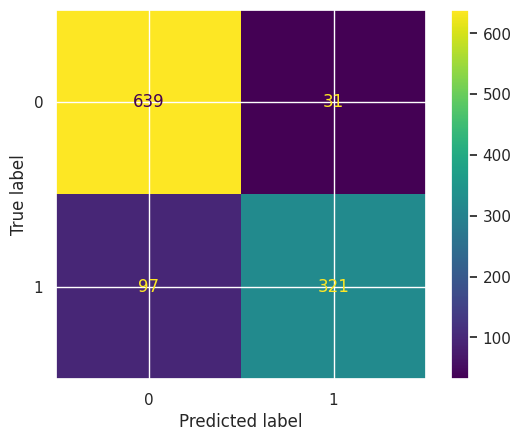

In [30]:
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [31]:
cnn.save('dementia detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model = load_model('dementia detection.h5')

In [33]:
def make_prediction(img):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    if res:
        print("Dementia Detected")
    else:
        print("No Dementia")

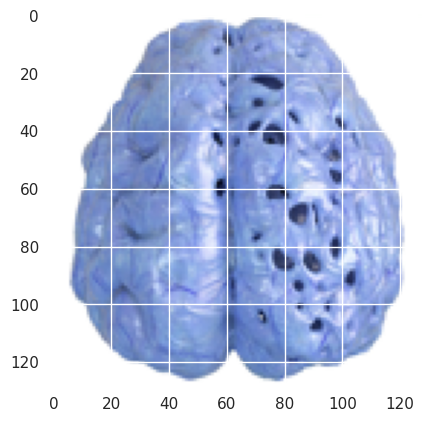

1/1 [==============================] - 0s 126ms/step
No Dementia


In [34]:
make_prediction('/content/drive/MyDrive/kaggle/Alzheimers-Brain-Disease.jpg')

/content/drive/MyDrive/kaggle/Dataset/Non_Demented/non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

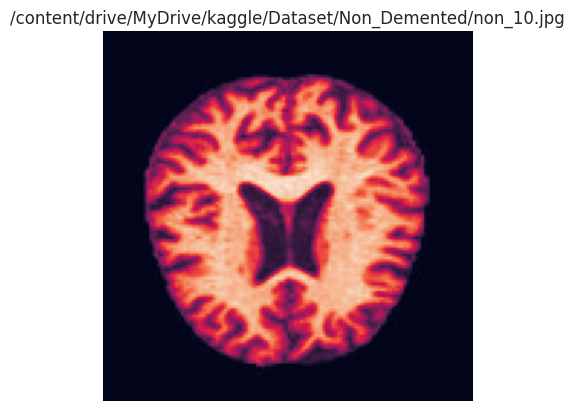

In [15]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

In [16]:
print(non[0])

/content/drive/MyDrive/kaggle/Dataset/Non_Demented/non.jpg


Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

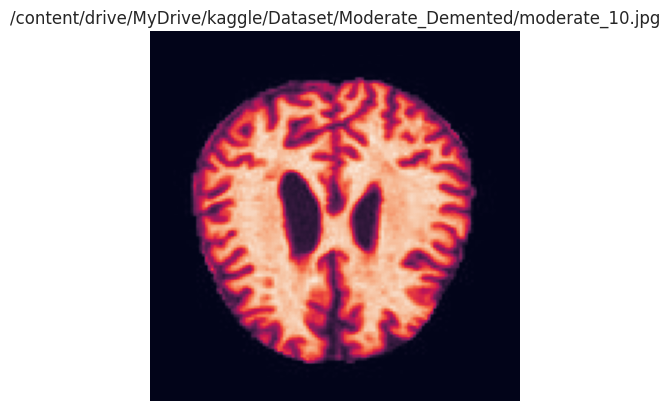

In [17]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

In [18]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(non) for non in non]
vmild_ALZ = [extract_feature(very_mild) for very_mild in very_mild]
mild_ALZ = [extract_feature(mild) for mild in mild]
moderate_ALZ = [extract_feature(moderate) for moderate in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

In [19]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)

In [20]:
print(len(non))
print(len(ALZ))
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

3200
3200
6400
[0 0 0 ... 0 0 0]


In [21]:

clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)



Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2575    0]
 [   0 2545]]


In [22]:
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y